In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
df=pd.read_csv('UPDATED_teen_phone_addiction_dataset.csv')

In [70]:
X=df.drop('Addiction_Level', axis=1)
y=df['Addiction_Level']

In [71]:
X

,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours
0,4.0,6.1,78,5,0.1,10,3,8,0,1.4,86,19,3.6,1.7,1.2,4,8.7
1,5.5,6.5,70,5,0.0,3,7,3,0,0.9,96,9,1.1,4.0,1.8,2,5.3
2,5.8,5.5,93,8,0.8,2,3,10,0,0.5,137,8,0.3,1.5,0.4,6,5.7
3,3.1,3.9,78,8,1.6,9,10,3,0,1.4,128,7,3.1,1.6,0.8,8,3.0
4,2.5,6.7,56,4,1.1,1,5,1,0,1.0,96,20,2.6,0.9,1.1,10,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3.9,6.4,53,4,0.9,7,10,2,1,0.3,80,15,2.7,1.8,1.0,8,9.4
2996,3.6,7.3,93,5,0.0,8,8,9,1,0.9,45,8,3.1,0.0,0.3,9,5.2
2997,3.2,6.5,98,1,0.0,4,3,9,0,0.2,51,13,2.4,0.2,2.4,9,5.9
2998,6.7,7.5,67,3,0.2,3,5,9,0,1.6,125,17,1.7,2.6,1.5,4,6.1


In [72]:
y

0       10.0
1       10.0
2        9.2
3        9.8
4        8.6
        ... 
2995     9.8
2996     5.5
2997     6.2
2998    10.0
2999     6.3
Name: Addiction_Level, Length: 3000, dtype: float64

In [73]:
#train test split    ---> using this to find the highly correlated features and then removing it
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [74]:
X_train.shape , X_test.shape

((2250, 17), (750, 17))

In [75]:
#feature selection based on correlation
X_train.corr(numeric_only=True)

,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,Exercise_Hours,Anxiety_Level,Depression_Level,Self_Esteem,Parental_Control,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Family_Communication,Weekend_Usage_Hours
Daily_Usage_Hours,1.000000,0.011105,0.024859,-0.010869,-0.010006,0.009274,0.012541,0.007515,-0.007079,0.001749,-0.001108,0.022389,-0.010840,-0.019256,0.005797,0.014355,-0.005396
Sleep_Hours,0.011105,1.000000,0.000484,-0.013070,0.017119,0.009681,-0.020814,0.030223,0.003721,-0.019961,0.002716,0.017558,-0.025626,0.009882,0.011474,-0.022878,0.006404
Academic_Performance,0.024859,0.000484,1.000000,0.010887,0.007241,0.003738,-0.015163,-0.004798,0.003080,0.010894,-0.020041,-0.025691,0.017763,-0.056315,0.009417,-0.015142,0.013048
Social_Interactions,-0.010869,-0.013070,0.010887,1.000000,0.020647,-0.025048,0.020704,0.018688,-0.022623,-0.027446,0.006725,-0.026956,0.014472,-0.006597,-0.009216,0.009378,-0.042356
Exercise_Hours,-0.010006,0.017119,0.007241,0.020647,1.000000,0.003989,-0.019714,-0.015820,0.029730,0.019096,-0.013522,-0.005279,-0.018943,0.004588,0.027605,-0.004733,0.037107
Anxiety_Level,0.009274,0.009681,0.003738,-0.025048,0.003989,1.000000,0.023086,0.023457,-0.008629,-0.007282,0.034332,0.011911,-0.002113,0.019164,0.035711,-0.003203,-0.002522
Depression_Level,0.012541,-0.020814,-0.015163,0.020704,-0.019714,0.023086,1.000000,-0.021915,-0.002501,-0.041420,-0.011383,0.018260,0.005871,-0.007364,-0.025661,-0.025489,-0.003919
Self_Esteem,0.007515,0.030223,-0.004798,0.018688,-0.015820,0.023457,-0.021915,1.000000,-0.010594,0.003515,0.001589,-0.032404,-0.009165,0.007358,-0.023047,-0.017618,-0.039254
Parental_Control,-0.007079,0.003721,0.003080,-0.022623,0.029730,-0.008629,-0.002501,-0.010594,1.000000,-0.032831,0.037488,-0.011790,-0.023069,-0.000261,0.046592,-0.001446,0.000954
Screen_Time_Before_Bed,0.001749,-0.019961,0.010894,-0.027446,0.019096,-0.007282,-0.041420,0.003515,-0.032831,1.000000,0.011360,0.009712,-0.001183,0.005503,0.039723,0.007175,0.035498


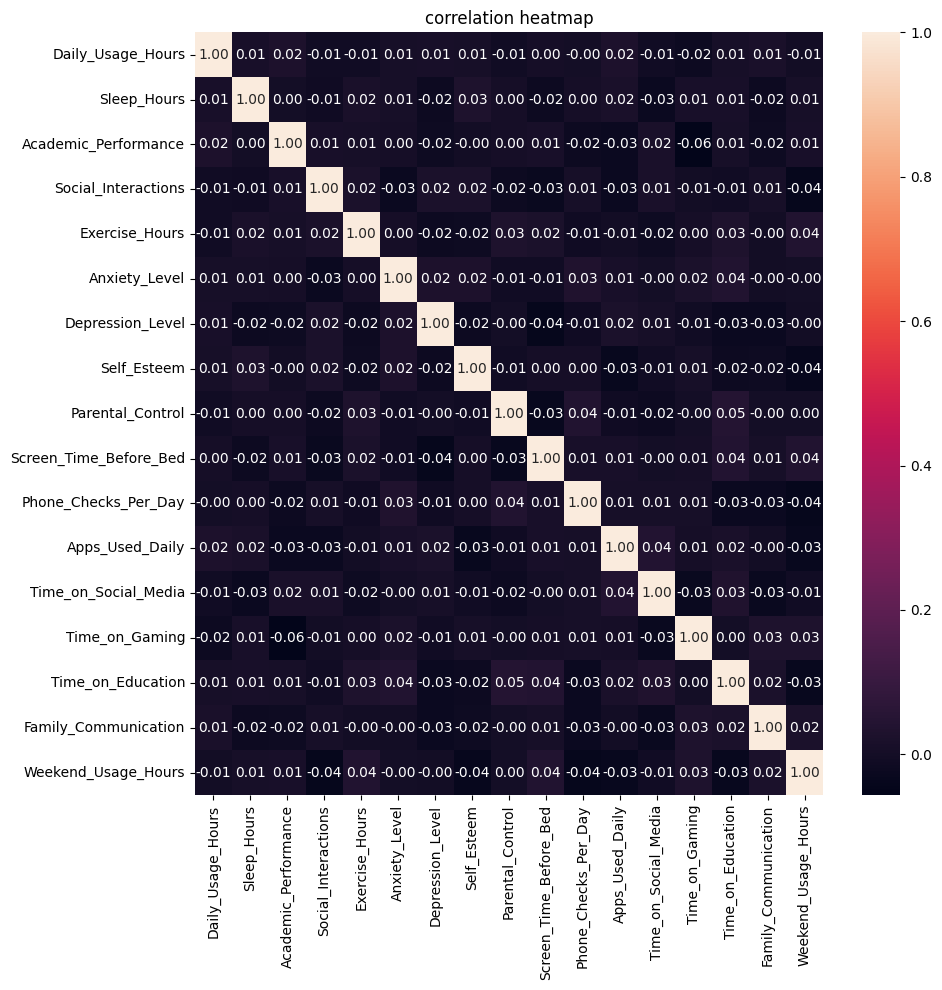

In [76]:
plt.figure(figsize=(10,10))
sns.heatmap(X_train.corr(numeric_only=True), annot=True, fmt='.2f')
plt.title("correlation heatmap")
plt.tight_layout()
plt.show()

In [77]:
# this function is used to remove the columns whose correlation matrix has a value
# exceeding than the threshold

def corre(dataset,threshold):

    numeric_data = dataset.select_dtypes(include=['number'])

    col_corr = set()
    corr_matrix = numeric_data.corr()
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j] > threshold):
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [78]:
corr_features = corre(X_train,0.40)

In [79]:
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((2250, 17), (750, 17))

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)

In [81]:
X_train_scaler

array([[-0.15951113, -1.75188999, -0.87892173, ..., -0.33313855,
         1.23982154, -0.67927068],
       [ 0.14864574,  1.35360634,  1.66109403, ...,  0.13465534,
        -0.16269151, -1.96157519],
       [-0.57038696, -0.19914183,  0.56270884, ..., -0.95686374,
        -0.51331978,  0.70167265],
       ...,
       [ 2.04894645, -0.94176051, -1.63406155, ...,  0.29058663,
         0.53856501, -1.07382591],
       [ 1.58671115,  1.89369265, -1.42811433, ...,  0.60244923,
        -1.56520456,  0.25779801],
       [ 1.38127323, -2.02193315, -0.26108006, ...,  0.60244923,
        -0.16269151, -0.18607663]], shape=(2250, 17))

Mean Absolute Error (MAE): 0.65
R² Score: 0.74


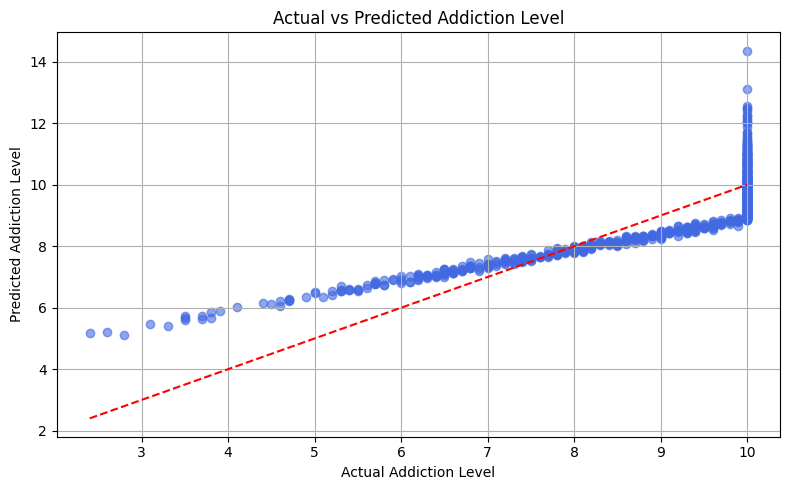

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

regression = LinearRegression()
regression.fit(X_train_scaler, y_train)

y_pred = regression.predict(X_test_scaler)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", round(mae, 2))
print("R² Score:", round(r2, 2))

# Scatter plot of actual vs predicted
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='royalblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel("Actual Addiction Level")
plt.ylabel("Predicted Addiction Level")
plt.title("Actual vs Predicted Addiction Level")
plt.grid(True)
plt.tight_layout()
plt.show()


In [83]:
from sklearn.metrics import mean_squared_error
import numpy as np

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", round(rmse, 2))


RMSE: 0.82


In [84]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaler, y_train)
y_pred_lr = lr.predict(X_test_scaler)

print("Linear R²:", r2_score(y_test, y_pred_lr))


Linear R²: 0.7371701537329234


In [85]:
from sklearn.linear_model import RidgeCV

ridgecv = RidgeCV(alphas=[0.01, 0.1, 1, 5, 10], cv=5)
ridgecv.fit(X_train_scaler, y_train)
y_pred_ridge = ridgecv.predict(X_test_scaler)

print("Ridge best alpha:", ridgecv.alpha_)
print("Ridge R²:", r2_score(y_test, y_pred_ridge))


Ridge best alpha: 10.0
Ridge R²: 0.737292841858542


In [86]:
from sklearn.linear_model import LassoCV

lassocv = LassoCV(alphas=[0.01, 0.05, 0.1, 0.5, 1], cv=5)
lassocv.fit(X_train_scaler, y_train)
y_pred_lasso = lassocv.predict(X_test_scaler)

print("Lasso best alpha:", lassocv.alpha_)
print("Lasso R²:", r2_score(y_test, y_pred_lasso))


Lasso best alpha: 0.01
Lasso R²: 0.7377531797062686


In [87]:
from sklearn.linear_model import ElasticNetCV

elasticcv = ElasticNetCV(alphas=[0.01, 0.05, 0.1, 0.5, 1], cv=5)

elasticcv.fit(X_train_scaler, y_train)
y_pred_elasticcv = elasticcv.predict(X_test_scaler)

print("elasticcv best alpha:", elasticcv.alpha_)
print("elasticcv R²:", r2_score(y_test, y_pred_elasticcv))




elasticcv best alpha: 0.01
elasticcv R²: 0.737819595588406


In [88]:
# Use elasticcv from your previous cell
print("ElasticNet best alpha:", elasticcv.alpha_)
print("ElasticNet best l1_ratio:", elasticcv.l1_ratio_)
print("ElasticNetCV R²:", r2_score(y_test, elasticcv.predict(X_test_scaler)))


ElasticNet best alpha: 0.01
ElasticNet best l1_ratio: 0.5
ElasticNetCV R²: 0.737819595588406


In [89]:
models = {
    "Linear": r2_score(y_test, y_pred_lr),
    "Ridge": r2_score(y_test, y_pred_ridge),
    "Lasso": r2_score(y_test, y_pred_lasso),
    "ElasticNetCV": r2_score(y_test, elasticcv.predict(X_test_scaler)),
}

for name, score in models.items():
    print(f"{name:10s} R² Score: {score:.4f}")


Linear     R² Score: 0.7372
Ridge      R² Score: 0.7373
Lasso      R² Score: 0.7378
ElasticNetCV R² Score: 0.7378


polynomial features

In [90]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaler)
X_test_poly = poly.transform(X_test_scaler)

elasticcv.fit(X_train_poly, y_train)
y_pred_poly = elasticcv.predict(X_test_poly)
print("ElasticNet with Poly R²:", r2_score(y_test, y_pred_poly))


ElasticNet with Poly R²: 0.9636750340635389


Pickle the ML model 

In [94]:
lassocv

,eps,0.001
,n_alphas,'deprecated'
,alphas,"[0.01, 0.05, ...]"
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,5
,verbose,False
,n_jobs,None


In [92]:
elasticcv

,l1_ratio,0.5
,eps,0.001
,n_alphas,'deprecated'
,alphas,"[0.01, 0.05, ...]"
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,cv,5
,copy_X,True
,verbose,0


In [95]:
import pickle
pickle.dump(lassocv,open('lassocv.pkl','wb'))
pickle.dump(elasticcv,open('elacsticcv.pkl','wb'))